In [74]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd 

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')



In [56]:
#x = np.random.randint(1,21,50)
#x
dado = stats.randint(1,21)


In [57]:
#P(6-9)
dado.pmf([6,7,8,9]).sum()

0.2

In [25]:
#P( al menos 12)

dado.pmf([12,13,14,15,16,17,18,19,20]).sum()

0.45

In [58]:
#P(3 o menos)
dado.pmf([1,2,3]).sum()


0.15000000000000002

In [30]:
for i in range(10):
    print("Lanzamiento #",i,":",dado.rvs())

Lanzamiento # 0 : 16
Lanzamiento # 1 : 4
Lanzamiento # 2 : 10
Lanzamiento # 3 : 17
Lanzamiento # 4 : 8
Lanzamiento # 5 : 3
Lanzamiento # 6 : 12
Lanzamiento # 7 : 10
Lanzamiento # 8 : 5
Lanzamiento # 9 : 17


(0.0, 1.0)

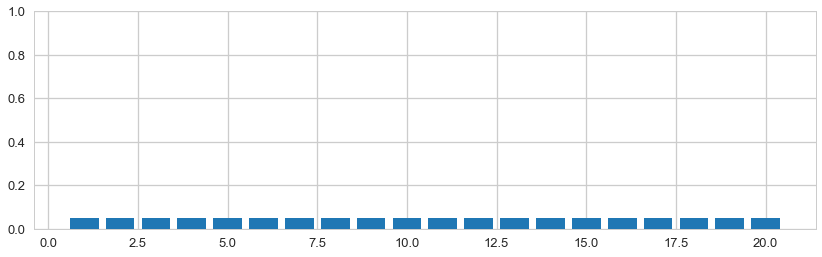

In [60]:
fig, ax = plt.subplots(figsize=(14, 4))

plt.bar(range(1,21),dado.pmf(range(1,21)))
plt.ylim([0,1])

P(9) 0.0006717597286400011
P(<4) 0.6481621045739525
P(<4) 0.6481621045739516
P(>3) 0.16423372393676816


<BarContainer object of 15 artists>

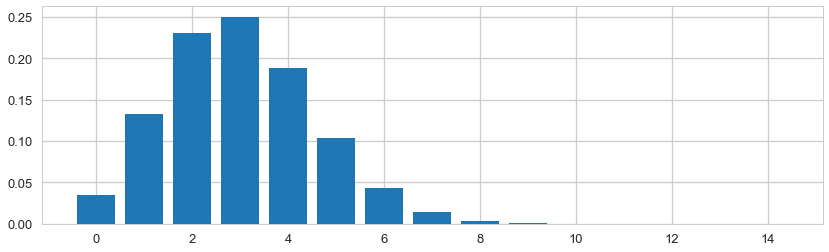

In [101]:
#Ejercicio 2 
##El apagador de una casa funciona 1 de 5 veces y al accionarlo 15 veces calcular la probabilidad de:
apagador = stats.binom(n=15,p=.2)


print("P(9)",apagador.pmf(9))

print("P(<4)",apagador.pmf([0,1,2,3]).sum())
print("P(<4)",apagador.cdf(3) )

print("P(>3)",1 - apagador.cdf(4) )


fig, ax = plt.subplots(figsize=(14, 4))

plt.bar(range(0,15),apagador.pmf(range(0,15)))



0.14936120510359185
0.3408636073614113
0.34086360736141147
0.9160820579686966


<BarContainer object of 15 artists>

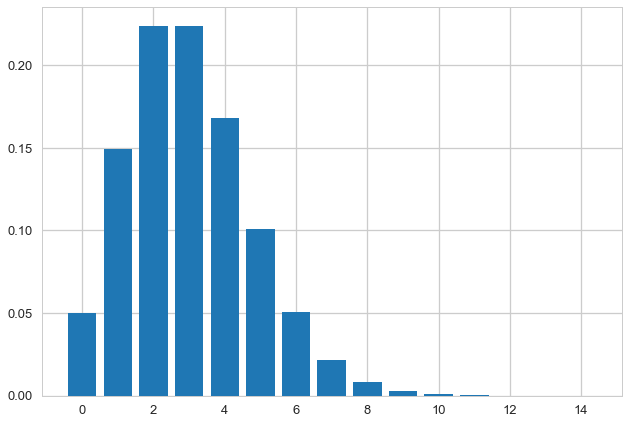

In [72]:
#Parte 3
vitrales = stats.poisson(mu = 3)

print(vitrales.pmf(1))

print(vitrales.cdf(7) - vitrales.cdf(3))
print(vitrales.pmf([4,5,6,7]).sum())
print(vitrales.cdf(5))

plt.bar(range(0,15),vitrales.pmf(range(0,15)))

299.47652015669064
0.0037252382828908285
6.435294450657381e-07
1.0353163808029694e-05
0.5333814893925649


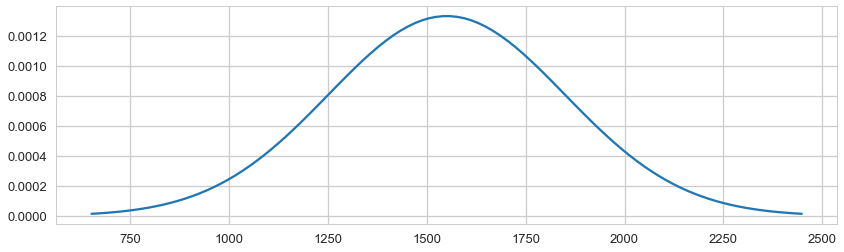

In [121]:
#Parte 4 - Fail
df_hogares = pd.read_csv('data/sqft.csv')

df_hogares.head()

mean = df_hogares["sqft"].mean() 
std = df_hogares["sqft"].std();

print(std)

normal = stats.norm(mean,std)

print(normal.cdf(855)-normal.cdf(804.99))
print(1 - normal.cdf(2999.9))
print(normal.cdf(275))
print(normal.cdf(1575))
fig, ax = plt.subplots(figsize=(14, 4))
x = np.linspace(mean - 3*std, mean + 3*std, 100)
ax.plot(x,normal.pdf(x))



sqft    0.00373
dtype: float64
sqft    0.0
dtype: float64
sqft    0.00002
dtype: float64


(array([1.5000e+01, 2.0600e+02, 2.6630e+03, 1.3871e+04, 3.2180e+04,
        3.2746e+04, 1.5047e+04, 3.0200e+03, 2.4300e+02, 9.0000e+00]),
 array([ 141.06930771,  421.07676101,  701.08421432,  981.09166762,
        1261.09912092, 1541.10657422, 1821.11402752, 2101.12148082,
        2381.12893412, 2661.13638743, 2941.14384073]),
 <BarContainer object of 10 artists>)

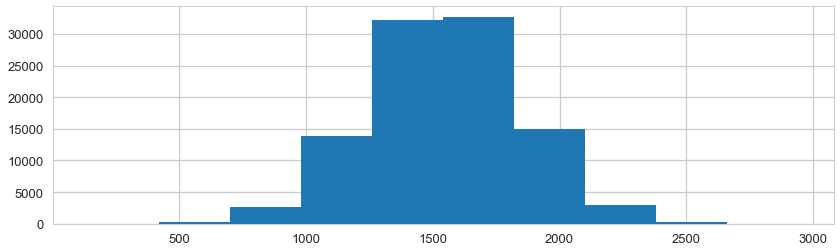

In [125]:
#Parte 4
#4.1 

df_4_1 = df_hogares[df_hogares["sqft"] > 805]

df_4_1 = df_4_1[df_4_1["sqft"] < 855 ]

print(df_4_1.count()/df_hogares.count())

#4.2

df_4_2 =  df_hogares[df_hogares["sqft"] > 3000]

print(df_4_2.count()/df_hogares.count())

#4.3

df_4_3 =  df_hogares[df_hogares["sqft"] < 275]

print(df_4_3.count()/df_hogares.count())

fig, ax = plt.subplots(figsize=(14, 4))

ax.hist(df_hogares["sqft"])

5.1:  0.1353352832366127
5.2.1:  0.28517980706429846
5.2.2:  0.6769268051894659
0.5
0.004957504353332717


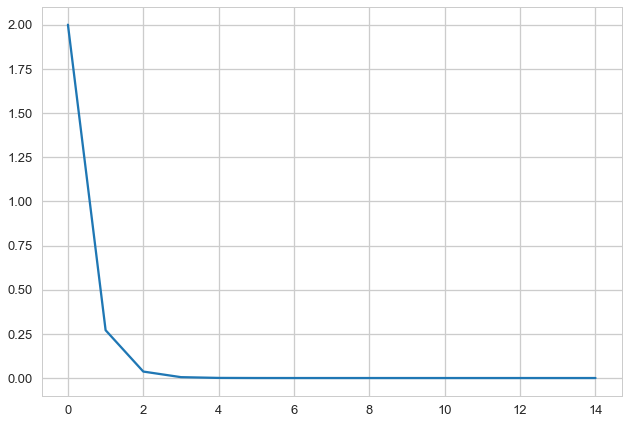

In [156]:
#Parte 5
meca = stats.poisson(mu = 2)

print("5.1: ",meca.pmf(0))



linea = stats.binom(n=20,p=0.1)
print("5.2.1: ",linea.pmf(2))
print("5.2.2: ",linea.cdf(2))


mu = 30/60
print(mu)
bar = stats.expon(0,mu)

print(bar.pdf(3))

t=15
plt.plot(range(0,t),bar.pdf(range(0,t)))






0.9932620530009145

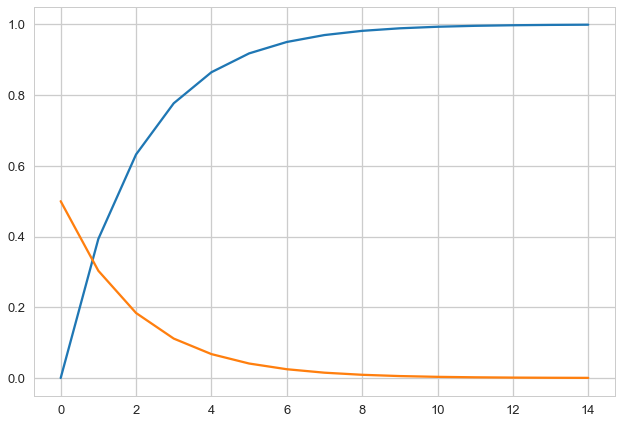

In [159]:
#Parte 6.1
#8% mide mas de 1.80 -> cumple
#tasa = 2ppm
#P de esperar 10 min o mas

alta = stats.expon(0,scale=2)
plt.plot(range(0,15),alta.cdf(range(0,15)))
plt.plot(range(0,15),alta.pdf(range(0,15)))

alta.cdf(10)


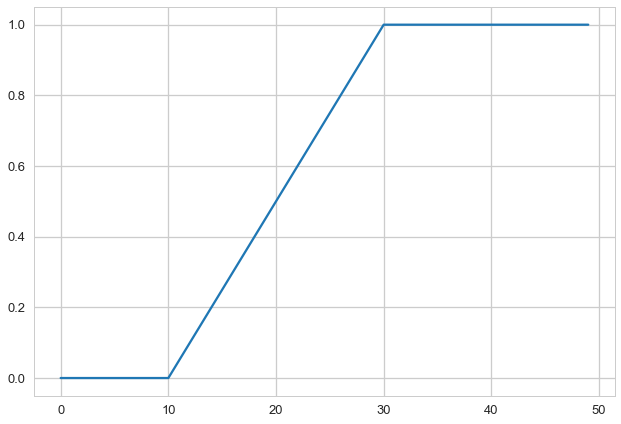

In [164]:
#Parte 6.2
vuelo = stats.randint(low=10, high = 30)

print('',vuelo.pmf(25))


vuelo2 = stats.uniform(loc = 10 , scale = 20)

plt.plot(range(0,50),vuelo2.cdf(range(0,50)))




In [171]:
#Parte 7
Nm = 1/5
gato = stats.poisson(Nm)

print('Parte 7.1:',gato.pmf(3))


tenedores = stats.nhypergeom(M=14,n=7,r=5)
print('Parte 7.2',tenedores.pmf([2,3,4,5]).sum() ) 

Parte 7.1: 0.0010916410041039767
Parte 7.2 0.6689976689976695


In [201]:
#Parte 8
#P(A) = 60% genios P*(A)=40%
#P(B) = 70 % chocolateros P*(B)=30%

#P(A|B) = 40 %
#P(A|B) = P(AnB)/P(B)



P=0.4*(.7-.3)
print("Parte 8.1:",P)

dato = stats.randint(low=1,high=6)

suma11=[]
suma12=[]

for i in range(1,7):
    for j in range(1,7):
        for k in range(1,7):
            suma = i+j+k
            if suma == 11:
                suma11.append(suma)
            elif suma == 12:
                suma12.append(suma)

total = 6**3


prob11=np.round(len(suma11)/total*100,1)
prob12=np.round(len(suma12)/total*100,1)


if prob11>12:
    print('Es mas probable que la suma sea 11')
else:
    print('Es mas probable que la suma sea 12')
    
    
#Parte 8.3

total = 90
grupos = 3
EpC = total/grupos
JJ = 2

def factorial(n):
    if n==0:
        res = 1
    else:
        res = n * factorial(n-1)
    
    return res
        
combinaciones = factorial(total)/(factorial(total-EpC)*factorial(EpC))

DosJ = factorial(total-JJ)/(factorial((total-JJ)-(EpC-JJ))*factorial(EpC-JJ))

print('Parte 8.3: ',np.round(3*(DosJ/combinaciones)*100,2),'%')

#Parte 8.4
total = 52
manos = 4
CpM = total/manos
As = 1 

print (CpM)
combinaciones = factorial(total)/(factorial(manos)*factorial(total-manos))
UnAs = factorial(CpM)/(factorial(As)*factorial(CpM-As))

print('Parte 8.4: ',UnAs**manos/combinaciones)




Parte 8.1: 0.16
1
Parte 8.3:  32.58 %
13.0
Parte 8.4:  0.00019207683073229291
